**Twiter sentiment analysis**

Using python

In [38]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

In [52]:
from google.colab import files
uploaded = files.upload()

Saving login_3.csv to login_3.csv


In [58]:
log = pd.read_csv('login_3.csv')

In [59]:
# Twitter API credentials
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [63]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API object while passing the auth info
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [68]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = "BillGates", count=100, lang = "en", tweet_mode="extended")

# Print the last 5 tweets from the account
i = 1
print("Show the 5 recent tweets: \n")
for tweet in posts[0:6]:
    print(str(i) + ') '+ tweet.full_text + '\n')
    i = i + 1

Show the 5 recent tweets: 

1) RT @OurWorldInData: Some countries responded successfully to the pandemic – and more broadly, some are much more successful in protecting t…

2) Clinical trials are critical to helping researchers better understand Alzheimer's. Improving how we identify and enroll participants in those trials will accelerate progress on diagnosing and treating the disease. https://t.co/PLUhTVOylO

3) I tackle every big new problem by asking two questions: Who has dealt with this problem well? And what can we learn from them? @ExemplarsHealth will help to fill the gap in global health knowledge sharing and to accelerate progress in saving lives. https://t.co/5OhO10BVVP

4) Of all the things I’ve learned from Warren Buffett (and there have been a lot), the most important might be what friendship is all about. Here’s why he’s a person that I admire as well as like: https://t.co/XbZTIfO90b

5) Happy 90th birthday, Warren! https://t.co/8nH2EulTR4

6) .@AbeShinzo, thank you for

In [70]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=["Tweets"])

df.head()

,Tweets
0,RT @OurWorldInData: Some countries responded s...
1,Clinical trials are critical to helping resear...
2,I tackle every big new problem by asking two q...
3,Of all the things I’ve learned from Warren Buf...
4,"Happy 90th birthday, Warren! https://t.co/8nH2..."


In [75]:
# Create a function to clean the tweets
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removes @mentions
    text = re.sub(r'#', '', text) # Removes the # symbol
    text = re.sub(r'RT[\s]+', '', text) # Removes RT(retweets)
    text = re.sub(r'https?:\/\/\S+', '',text) # Removes the hyper link
    return text

In [76]:
# Clean the text
df['Tweets']= df['Tweets'].apply(cleanText)

In [77]:
df

,Tweets
0,: Some countries responded successfully to the...
1,Clinical trials are critical to helping resear...
2,I tackle every big new problem by asking two q...
3,Of all the things I’ve learned from Warren Buf...
4,"Happy 90th birthday, Warren!"
...,...
95,This impressive new tool from _UW will help ho...
96,"This is encouraging news, but we still have a ..."
97,There are few people I’ve learned more from ov...
98,I’ve been impressed by governors across the co...


In [78]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [79]:
# Create a function to get the polarity
def getPolarity(text):
   return TextBlob(text).sentiment.polarity

In [80]:
# Create two new columns
df["Subjectivity"] = df["Tweets"].apply(getSubjectivity)
df["Polarity"] = df["Tweets"].apply(getPolarity)

In [81]:
# Show the new dataframe with the new columns

In [82]:
df

,Tweets,Subjectivity,Polarity
0,: Some countries responded successfully to the...,0.642500,0.512500
1,Clinical trials are critical to helping resear...,0.650000,0.250000
2,I tackle every big new problem by asking two q...,0.184848,0.045455
3,Of all the things I’ve learned from Warren Buf...,0.750000,0.450000
4,"Happy 90th birthday, Warren!",1.000000,1.000000
...,...,...,...
95,This impressive new tool from _UW will help ho...,0.504242,0.337273
96,"This is encouraging news, but we still have a ...",0.475714,0.172143
97,There are few people I’ve learned more from ov...,0.533333,0.433333
98,I’ve been impressed by governors across the co...,0.750000,0.750000


In [101]:
# Plotting Word Cloud
allWords = ' '.join([twts for twts in df["Tweets"]])
wordCloud = WordCloud(width = 600, height=400, random_state=21, max_font_size = 119).generate(allWords)

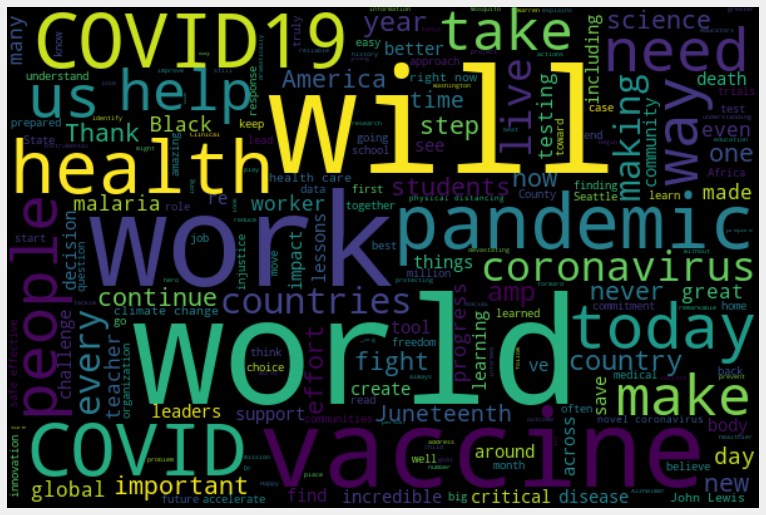

In [103]:
plt.figure(figsize=(12,9))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show();

In [105]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else: 
    return "Positive"

In [131]:
df["Analysis"] = df['Polarity'].apply(getAnalysis)

In [132]:
df

,Tweets,Subjectivity,Polarity,Analysis
0,: Some countries responded successfully to the...,0.642500,0.512500,Positive
1,Clinical trials are critical to helping resear...,0.650000,0.250000,Positive
2,I tackle every big new problem by asking two q...,0.184848,0.045455,Positive
3,Of all the things I’ve learned from Warren Buf...,0.750000,0.450000,Positive
4,"Happy 90th birthday, Warren!",1.000000,1.000000,Positive
...,...,...,...,...
95,This impressive new tool from _UW will help ho...,0.504242,0.337273,Positive
96,"This is encouraging news, but we still have a ...",0.475714,0.172143,Positive
97,There are few people I’ve learned more from ov...,0.533333,0.433333,Positive
98,I’ve been impressed by governors across the co...,0.750000,0.750000,Positive


In [140]:
df["Analysis"].value_counts()

Positive    64
Neutral     21
Negative    15
Name: Analysis, dtype: int64

In [151]:
df.Analysis.str.count("Negative").sum()

15

In [155]:
# Print the positive tweets
j=1
sortedDF = df.sort_values(by=["Polarity"])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ')' +sortedDF["Tweets"][i])
        print()
        j = j+1

1): Some countries responded successfully to the pandemic – and more broadly, some are much more successful in protecting t…

2)Clinical trials are critical to helping researchers better understand Alzheimer's. Improving how we identify and enroll participants in those trials will accelerate progress on diagnosing and treating the disease. 

3)I tackle every big new problem by asking two questions: Who has dealt with this problem well? And what can we learn from them?  will help to fill the gap in global health knowledge sharing and to accelerate progress in saving lives. 

4)Of all the things I’ve learned from Warren Buffett (and there have been a lot), the most important might be what friendship is all about. Here’s why he’s a person that I admire as well as like: 

5)Happy 90th birthday, Warren! 

6)., thank you for making the world a healthier and more equitable place. Your understanding of how we can improve global prosperity, through support of organizations like , has been truly

In [165]:
# Print the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending='False')
for i in range(0, sortedDF.shape[0]):
    if (sortedDF["Analysis"][i] == "Negative"):
      print(str(j)+ ')'+ sortedDF['Tweets'][i])
      print()
      j = j+1

1)Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise may never start college. This would be disastrous for these young people and for the country. Here’s what we’re doing to help: 

2): Three lessons that have been central to the COVID19 response in South Africa, Liberia, &amp; other countries:
🔸 Screening…

3)Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year.  founded _Tele to address this often-overlooked challenge. 

4): “It’s that clarity of language about the VALUE of black life in America that distinguishes Juneteenth as emancipation…

5): “Only those feigning blindness fail to see the body of work we are, and the work of body we have done. 

Everything is what it is…

6): Juneteenth recognizes &amp; celebrates Black people’s freedom and the end of slavery in the US!  19 Jun 1865 Union Army Genera…

7)_Nyongo: 1. This is Opal Le

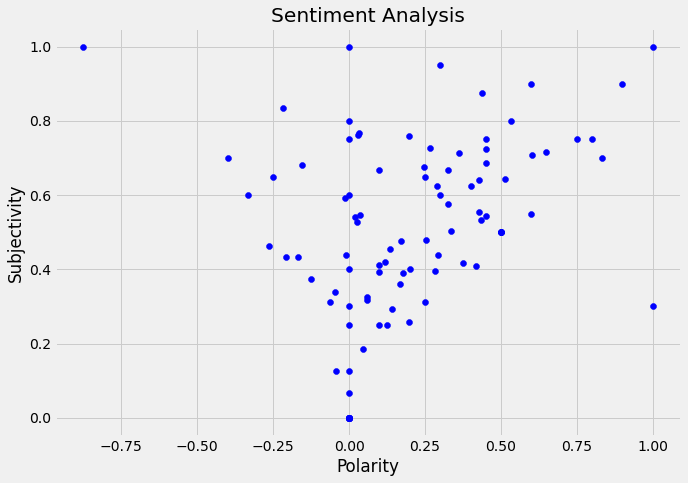

In [166]:
# Plotting the polarity and subjectivity
plt.figure(figsize=(10,7))
for i in range(0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color="Blue")
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show();

In [175]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets["Tweets"]

round((ptweets.shape[0] / df.shape[0])*100, 1)

64.0

In [176]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

In [180]:
round((ntweets.shape[0] / df.shape[0]*100),1)

15.0

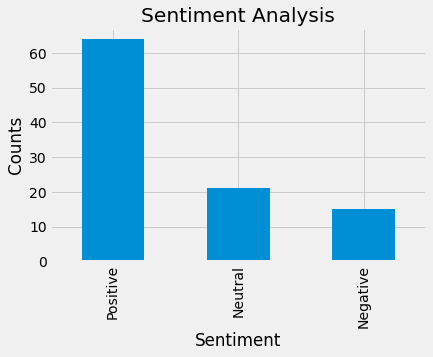

In [183]:
# Plotting and visualize the counts
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df["Analysis"].value_counts().plot(kind="bar")
plt.show()